In [2]:
import numpy as np
import pandas as pd
from sklearn import tree, neural_network, ensemble, svm, neighbors, linear_model
import matplotlib.pyplot as plt  
%matplotlib inline
import sklearn.model_selection as ms
from sklearn.metrics import accuracy_score

/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [3]:
dataset = pd.read_csv("./data/diabetes_renop/data.txt", header=None) 

In [8]:
dataset

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,1,1,22,22,22,19,18,14,49.895756,17.775994,5.270920,0.771761,0.018632,0.006864,0.003923,0.003923,0.486903,0.100025,1,0
1,1,1,24,24,22,18,16,13,57.709936,23.799994,3.325423,0.234185,0.003903,0.003903,0.003903,0.003903,0.520908,0.144414,0,0
2,1,1,62,60,59,54,47,33,55.831441,27.993933,12.687485,4.852282,1.393889,0.373252,0.041817,0.007744,0.530904,0.128548,0,1
3,1,1,55,53,53,50,43,31,40.467228,18.445954,9.118901,3.079428,0.840261,0.272434,0.007653,0.001531,0.483284,0.114790,0,0
4,1,1,44,44,44,41,39,27,18.026254,8.570709,0.410381,0.000000,0.000000,0.000000,0.000000,0.000000,0.475935,0.123572,0,1
5,1,1,44,43,41,41,37,29,28.356400,6.935636,2.305771,0.323724,0.000000,0.000000,0.000000,0.000000,0.502831,0.126741,0,1
6,1,0,29,29,29,27,25,16,15.448398,9.113819,1.633493,0.000000,0.000000,0.000000,0.000000,0.000000,0.541743,0.139575,0,1
7,1,1,6,6,6,6,2,1,20.679649,9.497786,1.223660,0.150382,0.000000,0.000000,0.000000,0.000000,0.576318,0.071071,1,0
8,1,1,22,21,18,15,13,10,66.691933,23.545543,6.151117,0.496372,0.000000,0.000000,0.000000,0.000000,0.500073,0.116793,0,1
9,1,1,79,75,73,71,64,47,22.141784,10.054384,0.874633,0.099780,0.023386,0.000000,0.000000,0.000000,0.560959,0.109134,0,1


In [13]:
y = dataset.values[:, -1]

In [12]:
x = dataset.values[:, :-1]

In [18]:
train_x, test_x, train_y, test_y = ms.train_test_split(x, y, test_size=0.3, random_state=0,stratify=y)  

In [23]:
print(train_x.shape)
print(train_y.shape)

(805, 19)
(805,)


In [24]:
def train_tree(data_x, data_y, criterion='gini', splitter='best', max_depth=None, min_samples_split=2,
                    min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None,
                    max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, class_weight=None,
                    presort=False):

    clf = tree.DecisionTreeClassifier(criterion=criterion, splitter=splitter, max_depth=max_depth,
                                      min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf,
                                      min_weight_fraction_leaf=min_weight_fraction_leaf, max_features=max_features,
                                      random_state=random_state, max_leaf_nodes=max_leaf_nodes,
                                      min_impurity_decrease=min_impurity_decrease, min_impurity_split=min_impurity_split,
                                      class_weight=class_weight, presort=presort)

    clf = clf.fit(data_x, data_y, None, None, None)

    return clf

In [30]:
d_tree = train_tree(train_x, train_y, max_depth=5)

In [31]:
d_tree

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [32]:
train_predict = d_tree.predict(train_x)
test_predict = d_tree.predict(test_x)

In [35]:
list1 = []
list2 = []

list1.append(accuracy_score(train_y, train_predict))
list2.append(accuracy_score(test_y, test_predict))

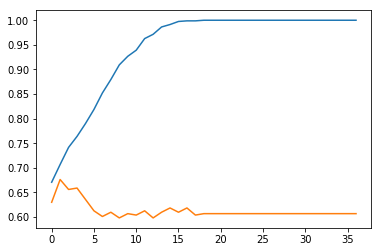

In [41]:
list1=[]
list2=[]
for depth in range(3,40):
    clf = tree.DecisionTreeClassifier(random_state=0, criterion='gini', max_depth=depth)
    clf = clf.fit(train_x, train_y)
    train_predict = clf.predict(train_x)
    test_predict = clf.predict(test_x)
    list1.append(accuracy_score(test_y, test_predict))
    list2.append(accuracy_score(train_y, train_predict))
    
plt.plot(range(len(list2)),list2)
plt.plot(range(len(list1)),list1)
plt.show()


In [53]:
dataset_shuttle = pd.read_csv("./data/shuttle/shuttle.trn.txt", header=None, sep=' ') 

In [54]:
y_s = dataset_shuttle.values[:, -1]
x_s = dataset_shuttle.values[:, :-1]
dataset_shuttle

,0,1,2,3,4,5,6,7,8,9
0,55,0,81,0,-6,11,25,88,64,4
1,56,0,96,0,52,-4,40,44,4,4
2,50,-1,89,-7,50,0,39,40,2,1
3,53,9,79,0,42,-2,25,37,12,4
4,55,2,82,0,54,-6,26,28,2,1
5,41,0,84,3,38,-4,43,45,2,1
6,37,0,100,0,36,-8,63,64,2,1
7,46,0,83,0,46,0,37,36,0,1
8,44,0,79,0,42,-17,35,37,2,1
9,44,-1,78,0,44,0,34,34,0,1


In [56]:
train_x, test_x, train_y, test_y = ms.train_test_split(x_s, y_s, test_size=0.25, random_state=0)  

In [57]:
print(train_x.shape)
print(test_x.shape)
print(train_y.shape)
print(test_y.shape)

(10875, 9)
(3625, 9)
(10875,)
(3625,)


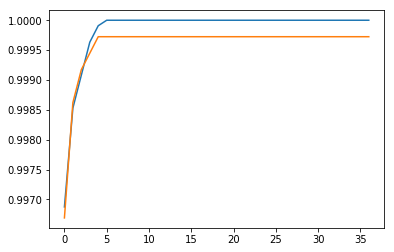

In [58]:
list1=[]
list2=[]
for depth in range(3,40):
    clf = tree.DecisionTreeClassifier(random_state=0, criterion='gini', max_depth=depth)
    clf = clf.fit(train_x, train_y)
    train_predict = clf.predict(train_x)
    test_predict = clf.predict(test_x)
    list1.append(accuracy_score(test_y, test_predict))
    list2.append(accuracy_score(train_y, train_predict))
    
plt.plot(range(len(list2)),list2)
plt.plot(range(len(list1)),list1)
plt.show()


In [4]:
dataset_white_wine = pd.read_csv("./data/wine/winequality-white.csv", sep=';') 

In [60]:
dataset_white_wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.270,0.36,20.70,0.045,45.0,170.0,1.00100,3.00,0.45,8.800000,6
1,6.3,0.300,0.34,1.60,0.049,14.0,132.0,0.99400,3.30,0.49,9.500000,6
2,8.1,0.280,0.40,6.90,0.050,30.0,97.0,0.99510,3.26,0.44,10.100000,6
3,7.2,0.230,0.32,8.50,0.058,47.0,186.0,0.99560,3.19,0.40,9.900000,6
4,7.2,0.230,0.32,8.50,0.058,47.0,186.0,0.99560,3.19,0.40,9.900000,6
5,8.1,0.280,0.40,6.90,0.050,30.0,97.0,0.99510,3.26,0.44,10.100000,6
6,6.2,0.320,0.16,7.00,0.045,30.0,136.0,0.99490,3.18,0.47,9.600000,6
7,7.0,0.270,0.36,20.70,0.045,45.0,170.0,1.00100,3.00,0.45,8.800000,6
8,6.3,0.300,0.34,1.60,0.049,14.0,132.0,0.99400,3.30,0.49,9.500000,6
9,8.1,0.220,0.43,1.50,0.044,28.0,129.0,0.99380,3.22,0.45,11.000000,6


In [61]:
y_ww = dataset_white_wine.values[:, -1]
x_ww = dataset_white_wine.values[:, :-1]
train_x, test_x, train_y, test_y = ms.train_test_split(x_ww, y_ww, test_size=0.25, random_state=0)  
print(train_x.shape)
print(test_x.shape)
print(train_y.shape)
print(test_y.shape)

(3673, 11)
(1225, 11)
(3673,)
(1225,)


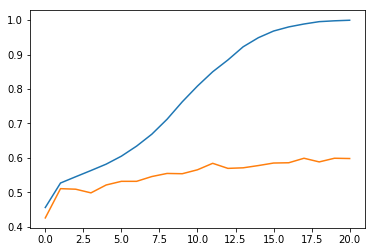

In [85]:
def plot_decision_tree_wine(x, y):
    train_x, test_x, train_y, test_y = ms.train_test_split(x, y, test_size=0.25, random_state=0)  
    list1=[]
    list2=[]
    for depth in range(1,x.shape[1] * 2):
        clf = train_tree(train_x, train_y, max_depth=depth)
        train_predict = clf.predict(train_x)
        test_predict = clf.predict(test_x)
        list1.append(accuracy_score(test_y, test_predict))
        list2.append(accuracy_score(train_y, train_predict))

    plt.plot(range(len(list2)),list2)
    plt.plot(range(len(list1)),list1)
    plt.show()

plot_decision_tree_wine(x_ww, y_ww)



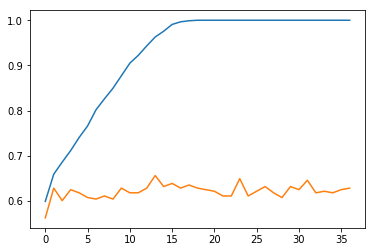

In [86]:
def plot_decision_tree_diabetes(x, y):
    train_x, test_x, train_y, test_y = ms.train_test_split(x, y, test_size=0.25, random_state=0)  
    list1=[]
    list2=[]
    for depth in range(1,x.shape[1] * 2):
        clf = train_tree(train_x, train_y, max_depth=depth)
        train_predict = clf.predict(train_x)
        test_predict = clf.predict(test_x)
        list1.append(accuracy_score(test_y, test_predict))
        list2.append(accuracy_score(train_y, train_predict))

    plt.plot(range(len(list2)),list2)
    plt.plot(range(len(list1)),list1)
    plt.show()

plot_decision_tree_diabetes(x, y)



In [100]:
def train_nn(x, y, hidden_layer_sizes=(20,5), activation='relu', alpha=0.0001, batch_size='auto',
            learning_rate='constant', learning_rate_init=0.001, power_t=.5, max_iter=200, 
            shuffle=True, random_state=None, tol=1e-4, ):
    clf = neural_network.MLPClassifier(hidden_layer_sizes=hidden_layer_sizes, activation=activation, alpha=alpha,
                                        batch_size=batch_size, learning_rate=learning_rate, 
                                        learning_rate_init=learning_rate_init, power_t=power_t,
                                        max_iter=max_iter, shuffle=shuffle, random_state=random_state,
                                        tol=tol)
    clf = clf.fit(x, y)

    return clf
    

/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


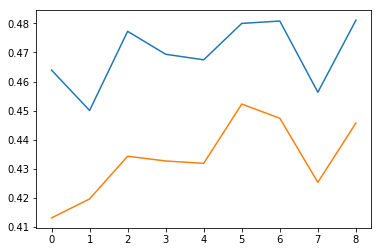

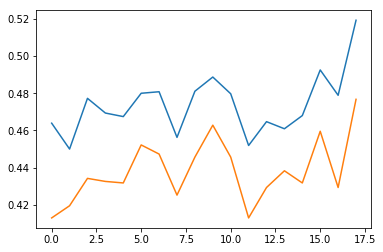

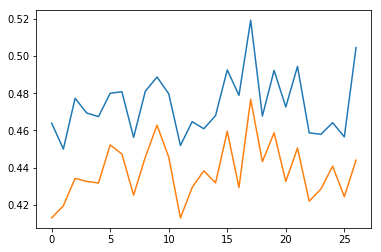

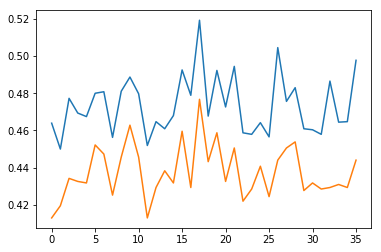

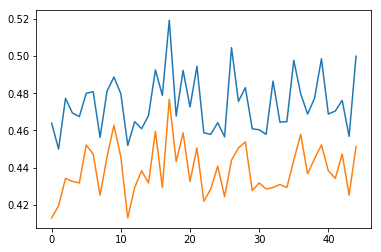

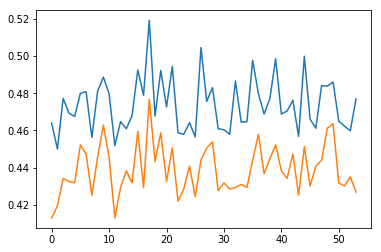

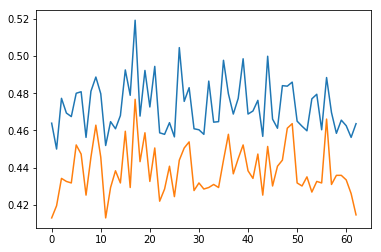

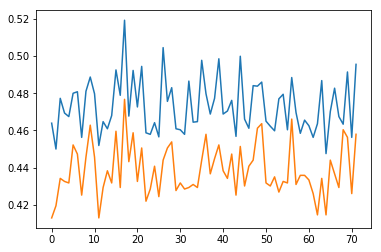

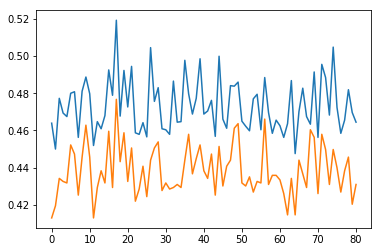

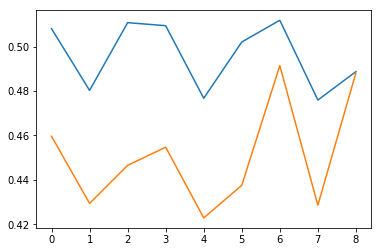

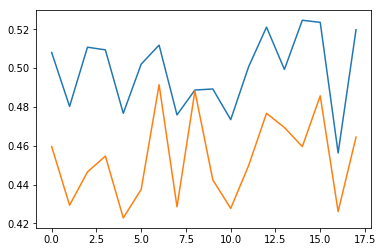

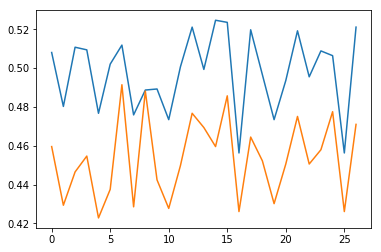

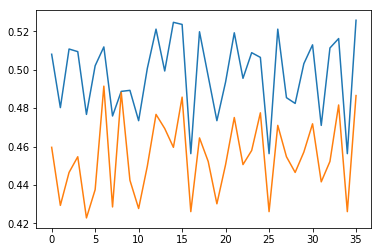

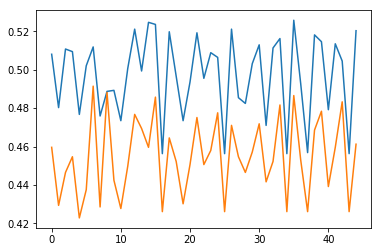

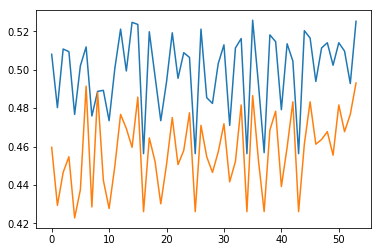

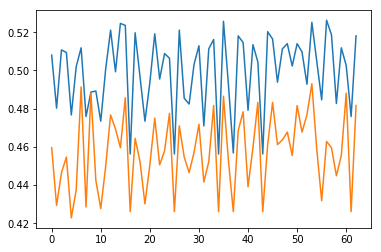

/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


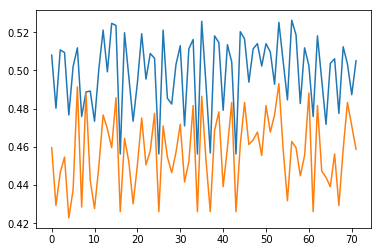

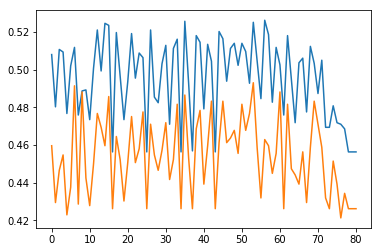

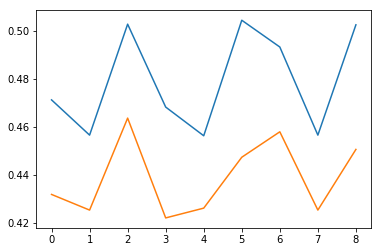

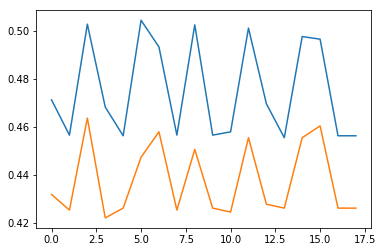

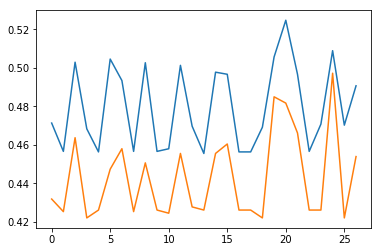

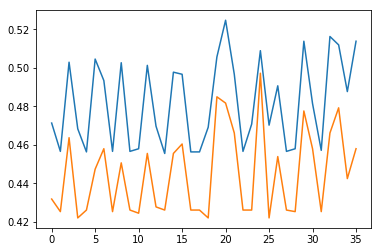

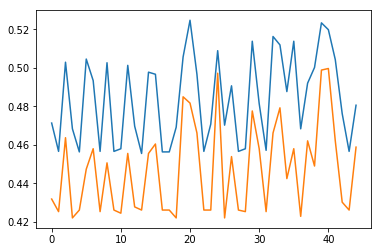

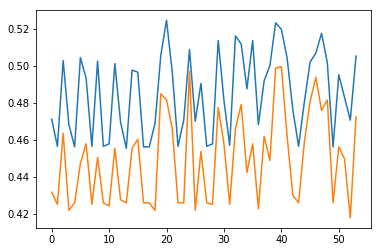

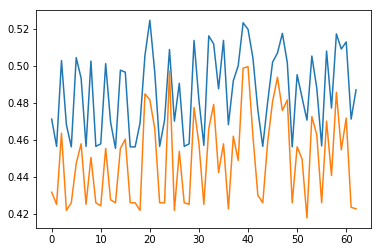

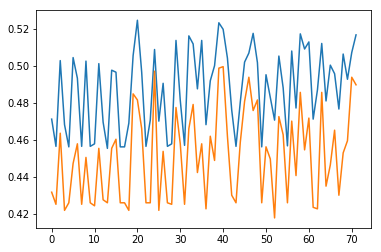

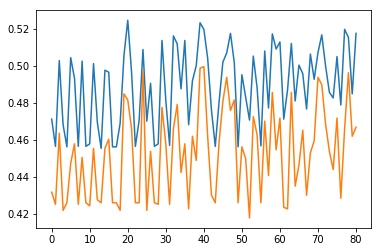

In [107]:
def plot_nn_wine(x, y):
    train_x, test_x, train_y, test_y = ms.train_test_split(x, y, test_size=0.25, random_state=0)  
    activation = ['relu', 'logistic', 'tanh']
    d = x.shape[1]
    nodes = [(h,)*l for l in [1,2,3] for h in [d,d//2,d*2]]
    
    for a in activation: 
        list1=[]
        list2=[]
        alphas = [.00000001, .0000001, .000001, .00001, .0001, .001, .01, .1, 1.]        
        for alpha in range(len(alphas)):
            for n in nodes:
                clf = train_nn(train_x, train_y, alpha=alphas[alpha], activation=a, hidden_layer_sizes=n )
                train_predict = clf.predict(train_x)
                test_predict = clf.predict(test_x)
                list1.append(accuracy_score(test_y, test_predict))
                list2.append(accuracy_score(train_y, train_predict))

            plt.plot(range(len(list2)),list2)
            plt.plot(range(len(list1)),list1)
            plt.show()

plot_nn_wine(x_ww, y_ww)



In [115]:
d = x_ww.shape[1]
t = [(h,)*l for l in [1,2,3] for h in [d,d//2,d*2]]

In [106]:
alphas = [10**-x for x in np.arange(-1,5.01,1/2)]
alphas

[10.0,
 3.1622776601683795,
 1.0,
 0.31622776601683794,
 0.1,
 0.03162277660168379,
 0.01,
 0.0031622776601683794,
 0.001,
 0.00031622776601683794,
 0.0001,
 3.1622776601683795e-05,
 1e-05]

/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


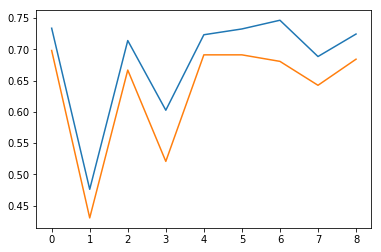

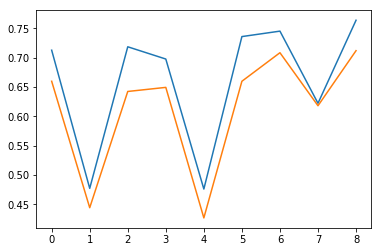

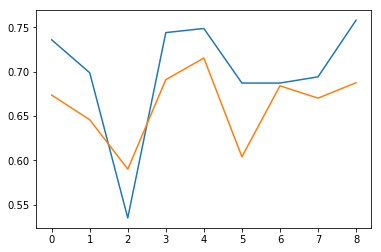

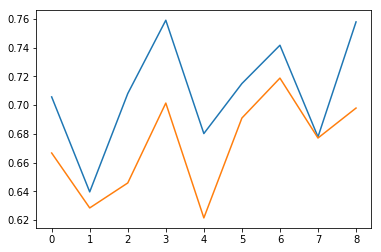

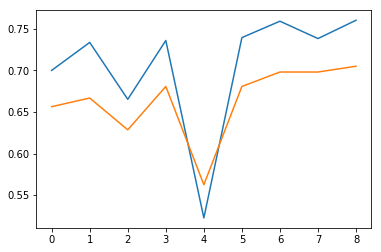

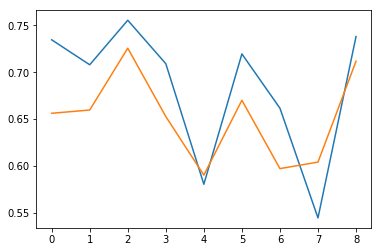

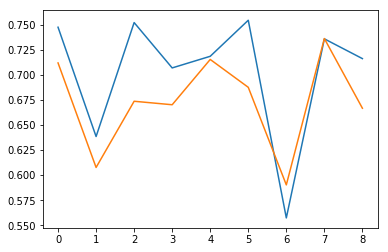

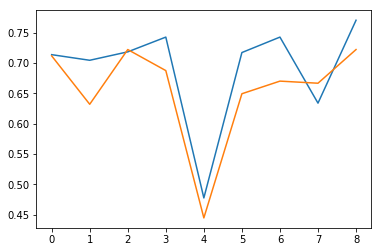

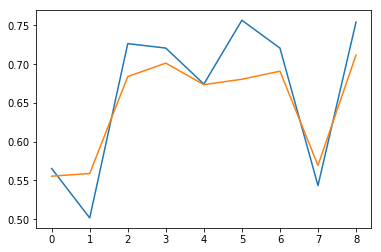

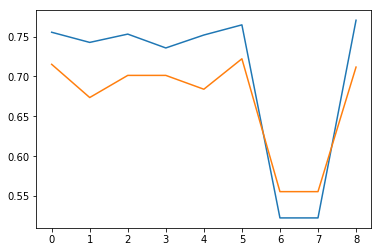

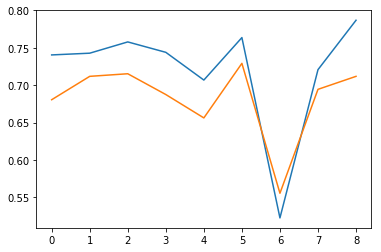

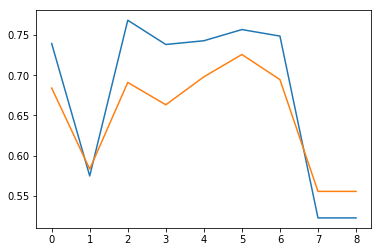

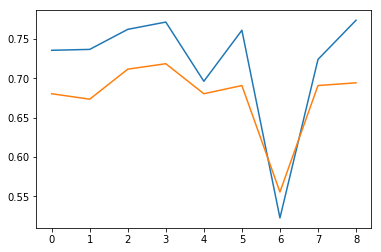

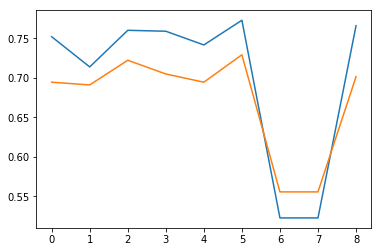

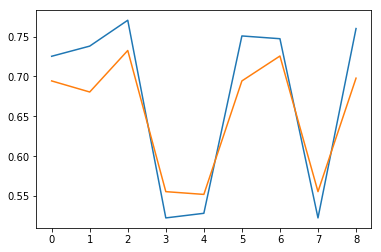

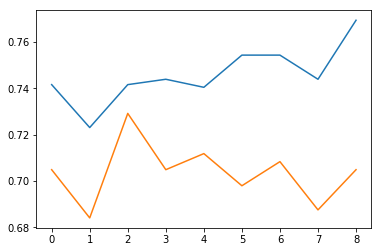

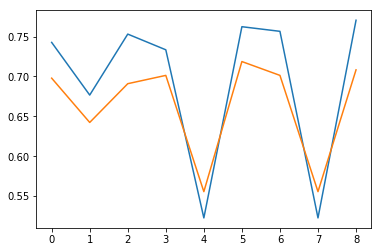

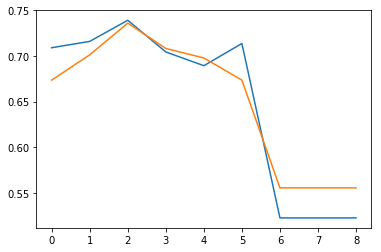

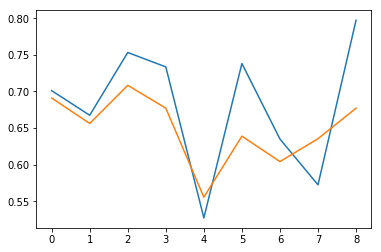

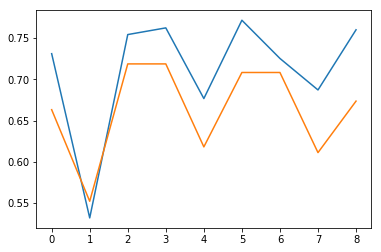

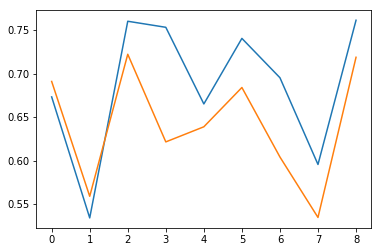

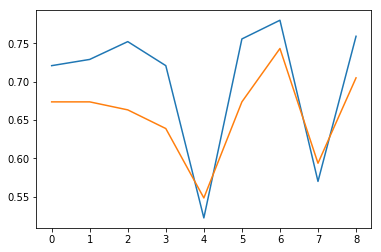

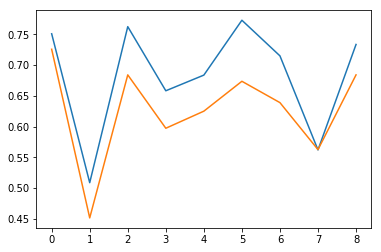

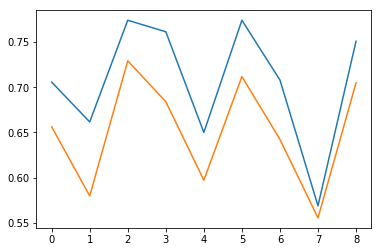

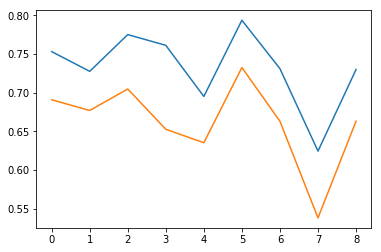

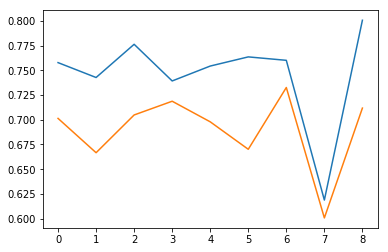

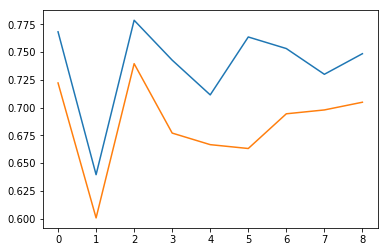

In [117]:
def plot_nn_dia(x, y):
    train_x, test_x, train_y, test_y = ms.train_test_split(x, y, test_size=0.25, random_state=0)  
    activation = ['relu', 'logistic', 'tanh']
    d = x.shape[1]
    nodes = t
    
    for a in activation: 
        alphas = [.00000001, .0000001, .000001, .00001, .0001, .001, .01, .1, 1.]        
        for alpha in range(len(alphas)):
            list1=[]
            list2=[]
            for n in nodes:
                clf = train_nn(train_x, train_y, alpha=alphas[alpha], activation=a, hidden_layer_sizes=n )
                train_predict = clf.predict(train_x)
                test_predict = clf.predict(test_x)
                list1.append(accuracy_score(test_y, test_predict))
                list2.append(accuracy_score(train_y, train_predict))

            plt.plot(range(len(list2)),list2)
            plt.plot(range(len(list1)),list1)
            plt.show()

plot_nn_dia(x, y)



In [119]:
def train_ada(x, y, base_estimator=None, n_estimators=50, learning_rate=1., algorithm='SAMME.R',
            random_state=None):
    clf = ensemble.AdaBoostClassifier(base_estimator=base_estimator, n_estimators=n_estimators, 
                                      learning_rate=learning_rate, algorithm=algorithm,
                                      random_state=random_state)
    clf = clf.fit(x, y)

    return clf


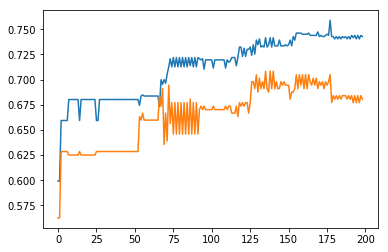

In [131]:
def plot_ada(x, y):
    train_x, test_x, train_y, test_y = ms.train_test_split(x, y, test_size=0.25, random_state=0)  
    n_estimators = 200
    list1=[]
    list2=[]
    
    for e in range(1, n_estimators): 
        clf = train_ada(train_x, train_y, n_estimators=e,  algorithm='SAMME')
        train_predict = clf.predict(train_x)
        test_predict = clf.predict(test_x)
        list1.append(accuracy_score(test_y, test_predict))
        list2.append(accuracy_score(train_y, train_predict))

    plt.plot(range(len(list2)),list2)
    plt.plot(range(len(list1)),list1)
    plt.show()

plot_ada(x, y)



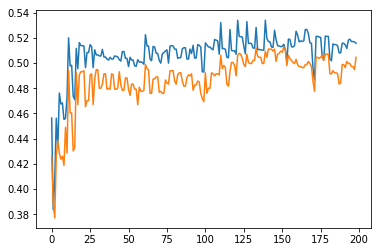

In [129]:
def plot_ada_2(x, y):
    train_x, test_x, train_y, test_y = ms.train_test_split(x, y, test_size=0.25, random_state=0)  
    n_estimators = 200
    list1=[]
    list2=[]
    
    for e in range(1, n_estimators): 
        clf = train_ada(train_x, train_y, n_estimators=e, algorithm='SAMME')
        train_predict = clf.predict(train_x)
        test_predict = clf.predict(test_x)
        list1.append(accuracy_score(test_y, test_predict))
        list2.append(accuracy_score(train_y, train_predict))

    plt.plot(range(len(list2)),list2)
    plt.plot(range(len(list1)),list1)
    plt.show()

plot_ada_2(x_ww, y_ww)

In [140]:
def train_svm(x, y, kernel='rbf', degree=3, gamma='auto', coef0=0.0,
             shrinking=True, probability=False, tol=1e-3, max_iter=-1):
    clf = svm.SVC(kernel=kernel, degree=degree, gamma=gamma, coef0=coef0, 
                 shrinking=shrinking, probability=probability, tol=tol)
    clf = clf.fit(x, y)

    return clf



In [ ]:
def plot_svc(x, y):
    train_x, test_x, train_y, test_y = ms.train_test_split(x, y, test_size=0.25, random_state=0)  
    kernels = ['rbf', 'poly', 'sigmoid']
    gammas = [.001, .01, .1, 1., 10.]
    
    for kernel in kernels:
        list1=[]
        list2=[]

        for gamma in gammas: 
            clf = train_svm(train_x, train_y, gamma=gamma, kernel=kernel)
            train_predict = clf.predict(train_x)
            test_predict = clf.predict(test_x)
            list1.append(accuracy_score(test_y, test_predict))
            list2.append(accuracy_score(train_y, train_predict))

        plt.plot(range(len(list2)),list2)
        plt.plot(range(len(list1)),list1)
        plt.show()




In [ ]:
plot_svc(x, y)

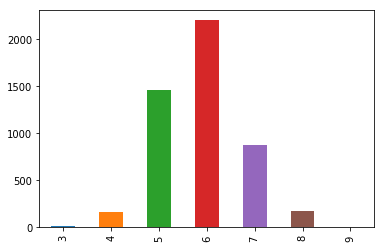

In [153]:
pd.value_counts(dataset_white_wine['quality']).sort_index().plot.bar()

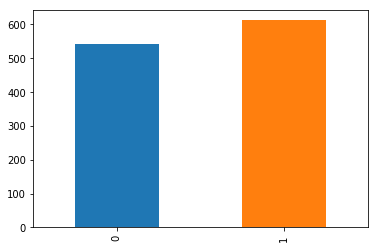

In [154]:
pd.value_counts(dataset[19]).sort_index().plot.bar()

In [155]:
pd.value_counts(dataset[19])

1    611
0    540
Name: 19, dtype: int64

In [156]:
611/ (611 + 540)

0.5308427454387489

In [5]:
pd.value_counts(dataset_white_wine['quality'])

6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: quality, dtype: int64

In [6]:
2198/ (2198 + 1457 + 880 + 175 + 163 + 20 + 5)

0.44875459371171905